Notebook to compare nowcast vs nowcast green along thalweg

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import teos_tools

%matplotlib inline

In [3]:
def results_dataset(results_dir, date, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    subdir = date.strftime('%d%b%y').lower()
    fname = os.path.join(results_dir, subdir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, datestr, grid_type))
    grid = nc.Dataset(fname)
    return grid

# Testing that plotting routines work with downbyone

Feb 7, 2016 comparison

In [4]:
nowcast = '/results/SalishSea/nowcast/'
nowcast_green = '/results/SalishSea/nowcast-green/'
date = datetime.datetime(2016, 2, 7)
grid_T = results_dataset(nowcast, date, '1d', 'grid_T')
grid_T_green = results_dataset(nowcast_green, date, '1d', 'grid_T')

In [5]:
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
mesh_mask_green = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')

grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
grid_B_green = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')

In [6]:
grids = {'nowcast': {'data': grid_T,
                     'bathy': grid_B,
                     'mesh': mesh_mask,
                     'depname': 'gdept',
                     'dep1D': 'gdept_0'},
        'nowcast-green': {'data': grid_T_green,
                          'bathy': grid_B_green,
                          'mesh': mesh_mask_green,
                          'depname':'gdept_0',
                          'dep1D': 'gdept_1d'},
         }

In [7]:
def compare_salinity_thalweg(grids, date):
    
    fig, axs = plt.subplots(2,1,figsize=(15,8))
    clevels =  [26, 27, 28, 29, 30, 30.2, 30.4, 30.6, 30.8, 31, 32, 33, 34]

    for ax, key in zip(axs, grids):
        # prepare for plotting
        grid = grids[key]
        sal = grid['data'].variables['vosaline'][:]
        tmask = grid['mesh'].variables['tmask'][:] + np.zeros(sal.shape)
        sal_mask = np.ma.array(sal, mask = 1-tmask)
        sal_plot = teos_tools.psu_teos(sal_mask[0,:,:,:])
        # plot
        mesh = vis.contour_thalweg(ax, sal_plot, grid['bathy'], grid['mesh'], grid['depname'], clevels )
        # pretty the plots
        ax.set_title('{} Salinity {}'.format(key, date.strftime('%d-%b-%Y')))
        cbar = plt.colorbar(mesh, ax=ax)
        cbar.set_label('Salinity [g/kg]')
        
        ax.set_ylim([450,0])
        ax.set_ylabel('Depth [m]')
        
        ax.set_xlabel('Distance along thalweg [km]')

## Salinity, full depth arrays, distance along thalweg

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


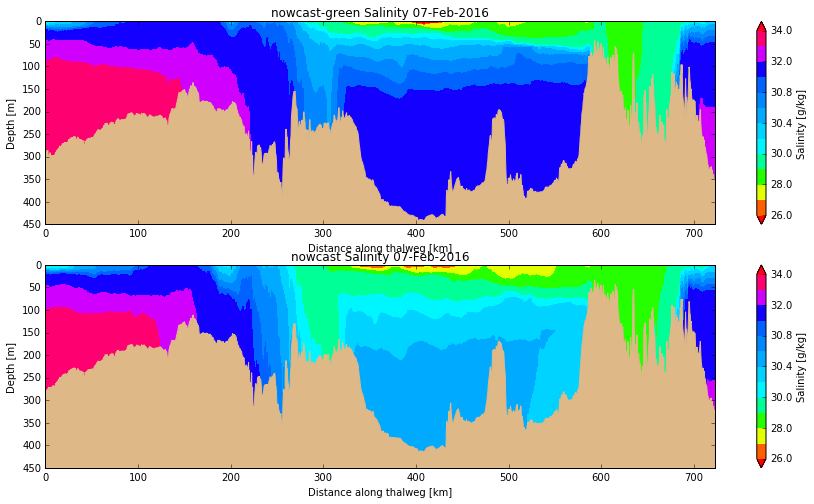

In [8]:
compare_salinity_thalweg(grids, date)

In [9]:
def compare_temperature_thalweg(grids, date):
    
    fig, axs = plt.subplots(2,1,figsize=(15,8))
    clevels = [6.9, 7, 7.5, 8, 8.5, 9, 9.8, 9.9, 10.3, 10.5, 11, 11.5, 12, 13, 14,
               15, 16, 17, 18, 19]

    for ax, key in zip(axs, grids):
        # prepare for plotting
        grid = grids[key]
        temp = grid['data'].variables['votemper'][:]
        tmask = grid['mesh'].variables['tmask'][:] + np.zeros(temp.shape)
        temp_mask = np.ma.array(temp, mask = 1-tmask)
        # plot
        mesh = vis.contour_thalweg(ax, temp_mask[0,:,:,:], grid['bathy'], grid['mesh'], grid['dep1D'], clevels,
                                  cmap='jet',xcoord='index')
        # pretty the plots
        ax.set_title('{} Temperature {}'.format(key, date.strftime('%d-%b-%Y')))
        cbar = plt.colorbar(mesh, ax=ax)
        cbar.set_label('Temperature [deg C]')
        
        ax.set_ylim([450,0])
        ax.set_ylabel('Depth [m]')
        
        ax.set_xlabel('Index along thalweg')

## Temperature, 1D depth arrays, thalweg index

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


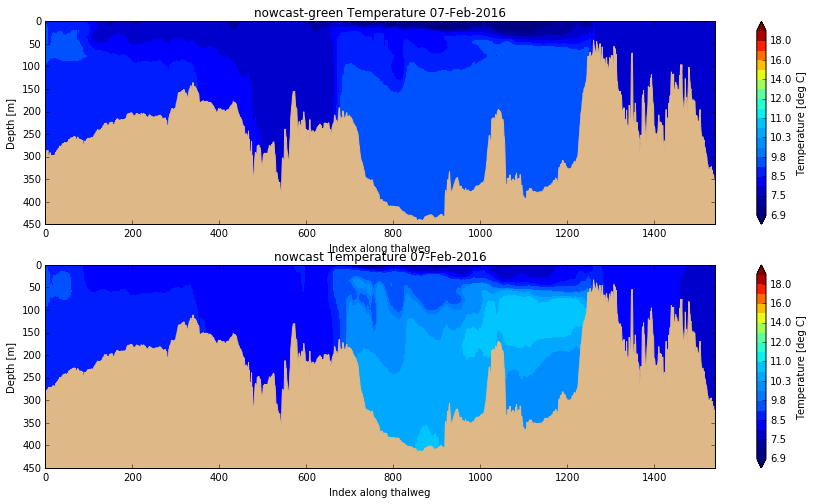

In [10]:
 compare_temperature_thalweg(grids, date)

# Recent comparison

In [11]:
date = datetime.datetime(2016, 4, 3)
grid_T = results_dataset(nowcast, date, '1d', 'grid_T')
grid_T_green = results_dataset(nowcast_green, date, '1d', 'grid_T')

mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
mesh_mask_green = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
grid_B_green = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea6.nc')

grids = {'nowcast': {'data': grid_T,
                     'bathy': grid_B,
                     'mesh': mesh_mask,
                     'depname': 'gdept',
                     'dep1D': 'gdept_0'},
        'nowcast-green': {'data': grid_T_green,
                          'bathy': grid_B_green,
                          'mesh': mesh_mask_green,
                          'depname':'gdept',
                          'dep1D': 'gdept_0'},
         }

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


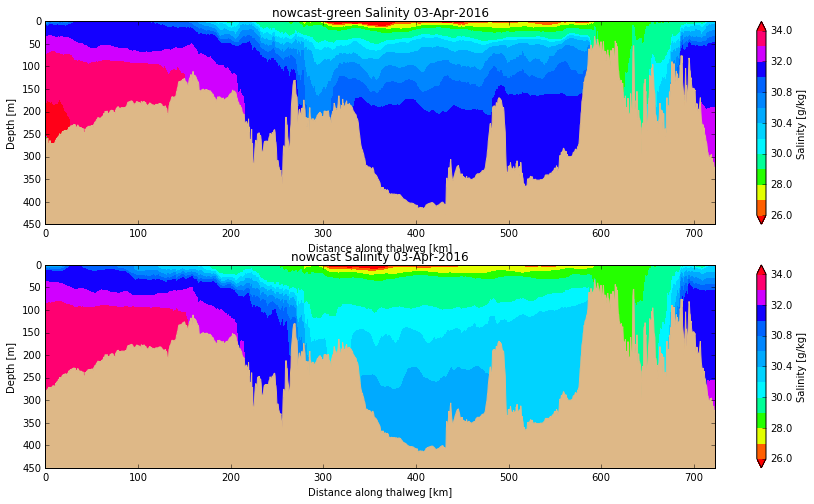

In [12]:
compare_salinity_thalweg(grids, date)

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


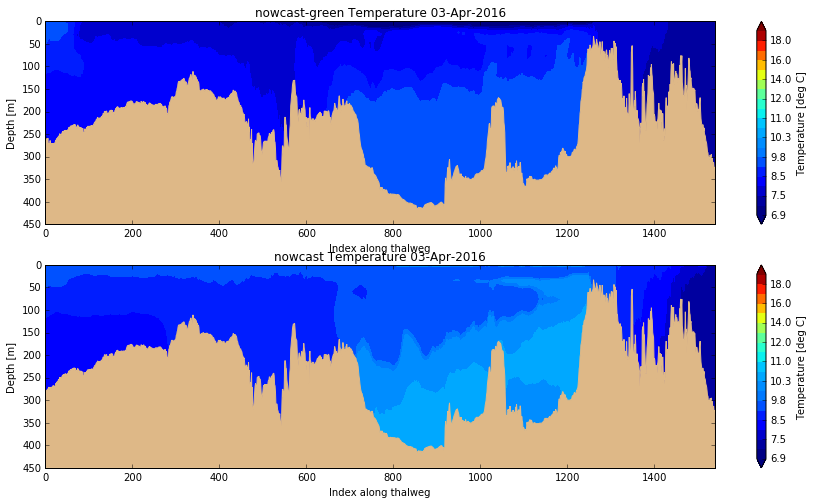

In [13]:
compare_temperature_thalweg(grids, date)

In [14]:
def compare_surface_temperature(grids, date):
    
    fig, axs = plt.subplots(1,2,figsize=(15,8))
    clevels = [0,2,4,6.9, 7, 7.5, 8, 8.5, 9, 9.8, 9.9, 10.3, 10.5, 11, 11.5, 12, 13, 14]

    for ax, key in zip(axs, grids):
        # prepare for plotting
        grid = grids[key]
        temp = grid['data'].variables['votemper'][:]
        tmask = grid['mesh'].variables['tmask'][:] + np.zeros(temp.shape)
        temp_mask = np.ma.array(temp, mask = 1-tmask)
        
        mesh  = ax.contourf(temp_mask[0,0,:,:], clevels, extend='both')
        
        # pretty the plots
        ax.set_title('{} Temperature {}'.format(key, date.strftime('%d-%b-%Y')))
        cbar = plt.colorbar(mesh, ax=ax)
        cbar.set_label('Temperature [deg C]')
        

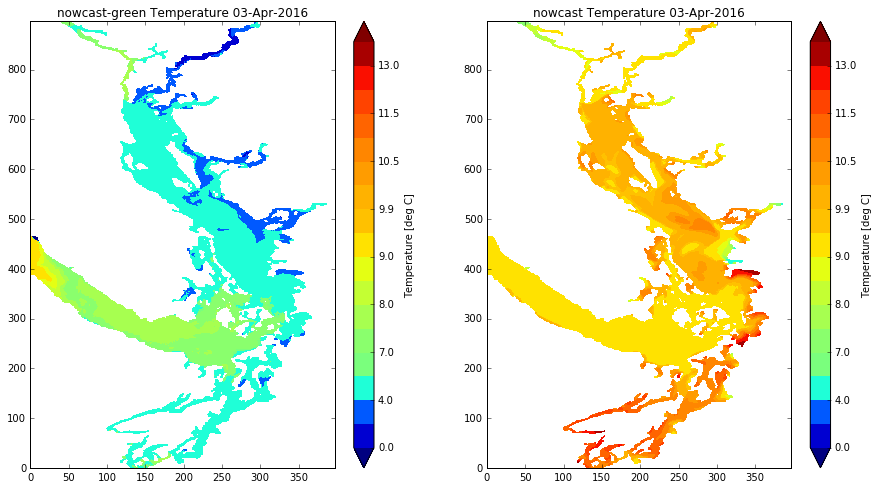

In [15]:
 compare_surface_temperature(grids, date)

Weird things in recent comparison
1. Using the mesh_mask_SalishSea2.nc and bathy_meter_SalishSea6.nc for nowcast-green plots.I can't find the mesh_mask file for bathy_meter_SalishSea6.nc.
2. Bathymetry near mouth of Juan de Fuca is different between bathy_meter_SalishSea2.nc and bathy_meter_SalishSea6.nc. Why?
3. nowcast-green surface temperature is super cold. Why? Biology?